# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/PGPAIML/Project-1/'

Mounted at /content/drive


In [3]:
# Write your code here to read the data
data = pd.read_csv(path+'/foodhub_order.csv')

In [5]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
data.shape

(1898, 9)

#### Observations: This dataset have 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: In this dataset we have 4 int columns and 1 float (cost_of_the_order) and 4 string data type columns. The entire dataset needs 133.6+ KB of memory at runtime.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: As observed above there exists no missing values in any of the columns. Hence this dataset has no missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
data.describe().T.round(decimals=3)

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.500,548.050,1476547.00,1477021.25,1477495.50,1477969.750,1478444.00
customer_id,1898.0,171168.478,113698.140,1311.00,77787.75,128600.00,270525.000,405334.00
cost_of_the_order,1898.0,16.499,7.484,4.47,12.08,14.14,22.298,35.41
food_preparation_time,1898.0,27.372,4.632,20.00,23.00,27.00,31.000,35.00
delivery_time,1898.0,24.162,4.973,15.00,20.00,25.00,28.000,33.00


#### Observations:
*   order_id & customer_id as they are id columns the stat data does not provide
much insight except their min and max range.
*   cost_of_the_order varies from \$4.47 to \$35.41 with mean=16.499, medean=14.14, 25th percentile = 12.08 and 75th percentile = 22.29. Also the standard deviation is 7.484.
*   food_preparation_time varies from 20 min to 35.41 min with mean=27.37, medean=27.00, 25th percentile = 23.00 and 75th percentile = 31.00. Also the standard deviation is 4.623.
*   delivery_time varies from 15.00 min to 33.00 min with mean=24.16, medean=25.00, 25th percentile = 25.00 and 75th percentile = 28.00. Also the standard deviation is 7.973.
*   Also as the food_preparation_time have mean and median are very close it is expected that food preparation time is symetrically discributed.
*   Delivery time also can be said to have symetrical distribution tendency.
*   It is also observed that most cases the food preparation time is very slightly higher than delivery time.






### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
data[data['rating'] == 'Not given'].count()

,0
order_id,736
customer_id,736
restaurant_name,736
cuisine_type,736
cost_of_the_order,736
day_of_the_week,736
rating,736
food_preparation_time,736
delivery_time,736


#### Observations: From the above data, we can clearly say that we have 736 rows of data where rating is not provided by the customer.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

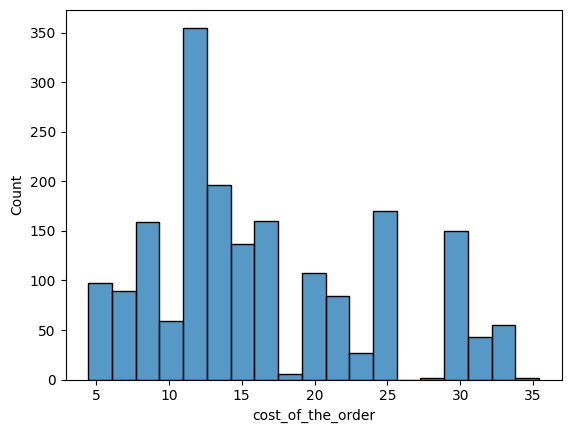

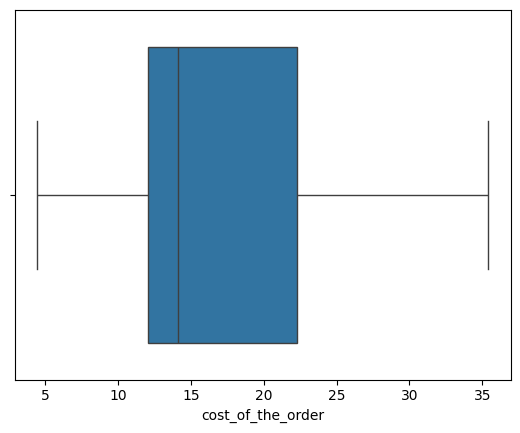

In [ ]:
# Write the code here
sns.histplot(data=data,x='cost_of_the_order')
plt.show()
sns.boxplot(data=data,x='cost_of_the_order')
plt.show()
# sns.countplot(data=data,x='cost_of_the_order')
# plt.locator_params(axis='x', nbins=35)
# plt.show()

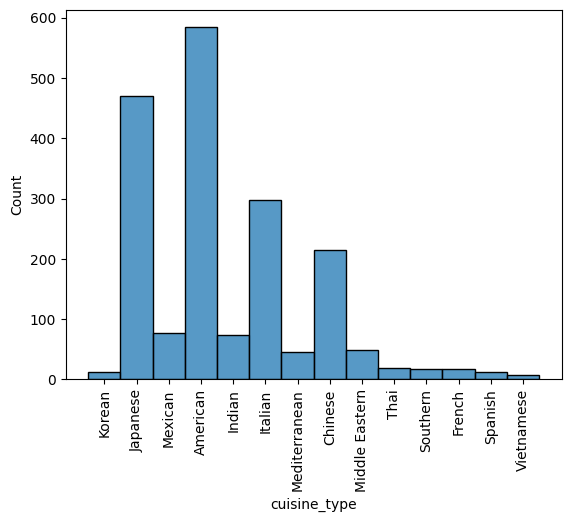

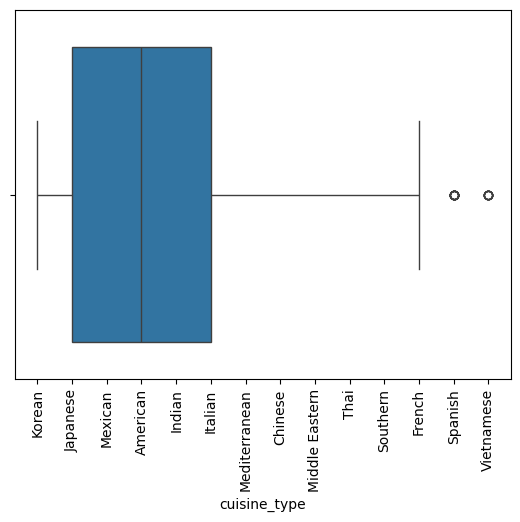

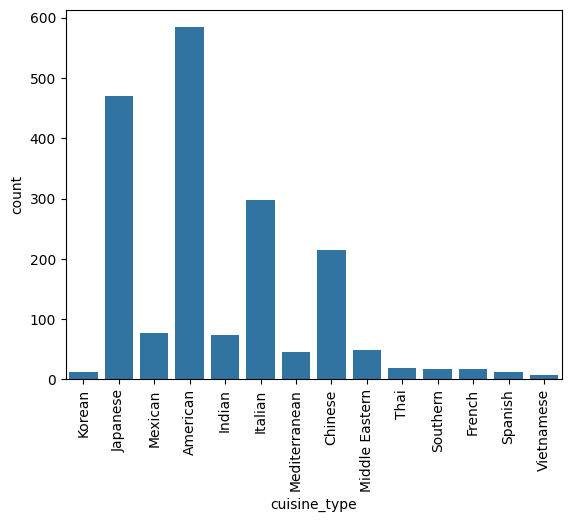

In [6]:
plt.xticks(rotation=90)
sns.histplot(data=data,x='cuisine_type')
plt.show()
plt.xticks(rotation=90)
sns.boxplot(data=data,x='cuisine_type')
plt.show()
plt.xticks(rotation=90)
sns.countplot(data=data,x='cuisine_type')
plt.show()

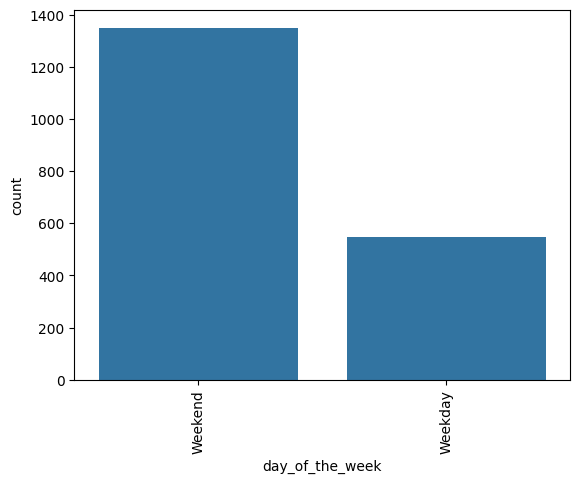

In [ ]:
plt.xticks(rotation=90)
sns.countplot(data=data,x='day_of_the_week')
plt.show()

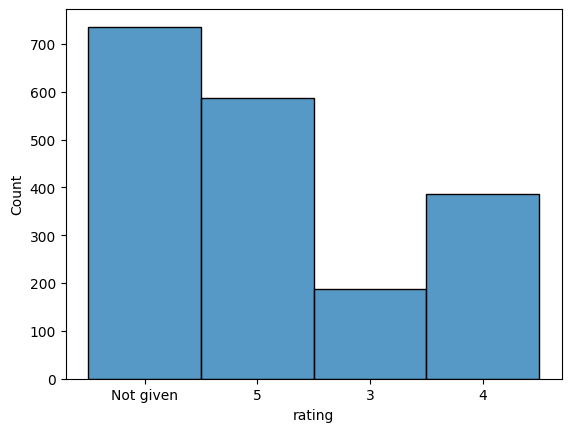

In [ ]:
sns.histplot(data=data,x='rating')
plt.show()

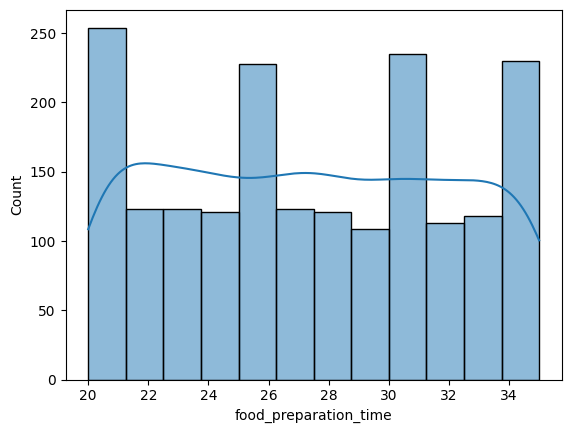

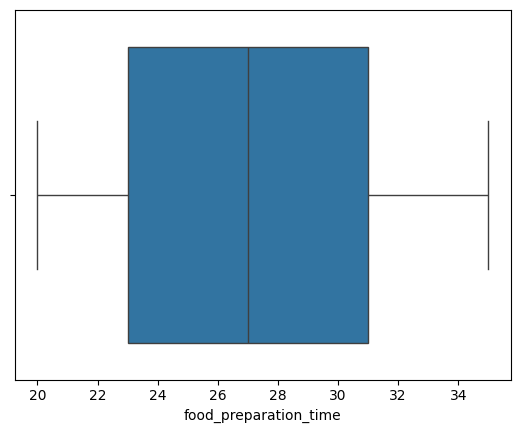

In [ ]:
sns.histplot(data=data,x='food_preparation_time', kde=True)
plt.show()
sns.boxplot(data=data,x='food_preparation_time')
plt.show()

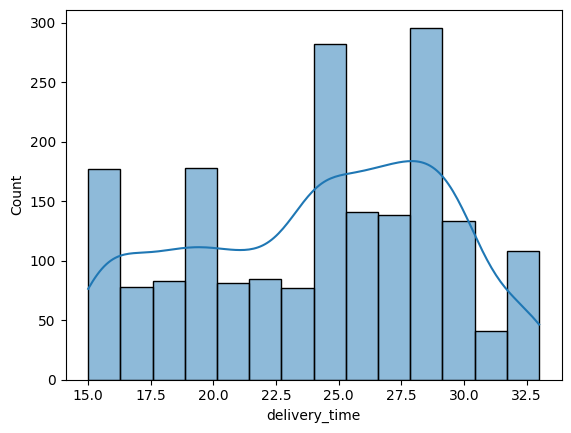

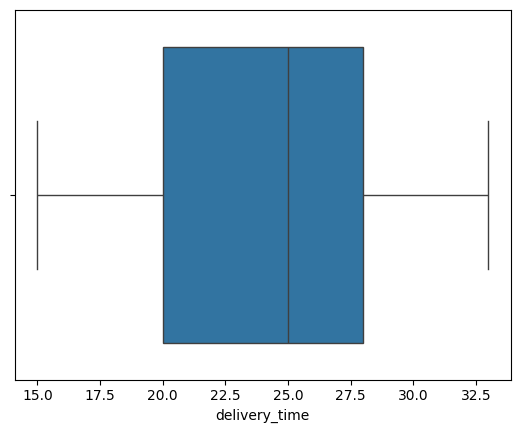

In [ ]:
sns.histplot(data=data,x='delivery_time', kde=True)
plt.show()
sns.boxplot(data=data,x='delivery_time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
print("Total number of orders:", data['order_id'].count())
print("Total number of restaurents:", data['restaurant_name'].nunique())
data['restaurant_name'].value_counts()

Total number of orders: 1898
Total number of restaurents: 178


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
print("Total number of cuisine type:", data['cuisine_type'].nunique())
data[data['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

Total number of cuisine type: 14


,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [12]:
# Write the code here
data[data['cost_of_the_order'] > 20]['order_id'].count() / data['order_id'].count() * 100

29.24130663856691

#### Observations:


29.24130663856691


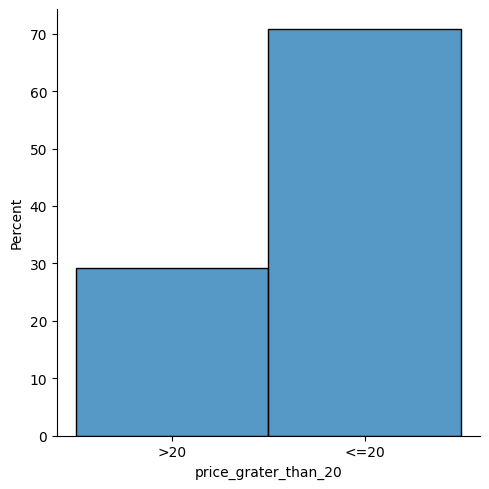

In [53]:
print(data[data['cost_of_the_order'] > 20]['order_id'].count() / data['order_id'].count() * 100)
df = data[['order_id', 'cost_of_the_order']].copy()
df['price_grater_than_20'] = (data['cost_of_the_order'] > 20).map({False: '<=20', True: '>20'})
sns.displot(data=df, x='price_grater_than_20', stat='percent');
plt.show()

### **Question 10**: What is the mean order delivery time? [1 mark]

Mean of column:delivery_time is 24.161749209694417


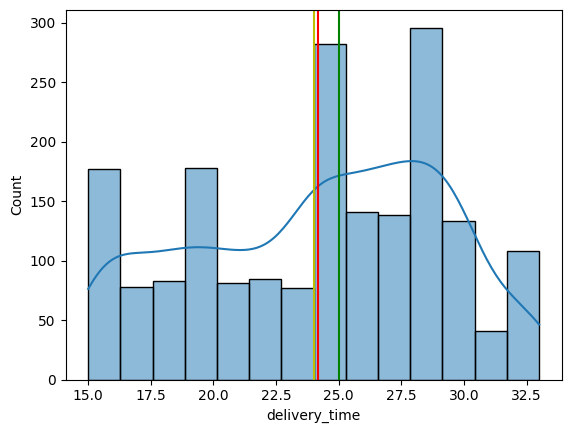

In [52]:
# Write the code here
print('Mean of column:delivery_time is',data['delivery_time'].mean())

# f, (a, xaxis) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.0, 1)})
f, xaxis = plt.subplots(nrows=1, ncols=1,gridspec_kw=None)
mean=data['delivery_time'].mean()
median=data['delivery_time'].median()
mode=data['delivery_time'].mode().values[0]
sns.histplot(data=data, x="delivery_time", ax=xaxis, kde=True)
xaxis.axvline(mean, color='r', label="Mean")
xaxis.axvline(median, color='g', label="Median")
xaxis.axvline(mode, color='y', label="Mode")
plt.show()

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [58]:
# Write the code here
data.groupby(['customer_id'])['order_id'].count().sort_values(ascending=False)



,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
...,...
105903,1
105992,1
106006,1


#### Observations:


### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


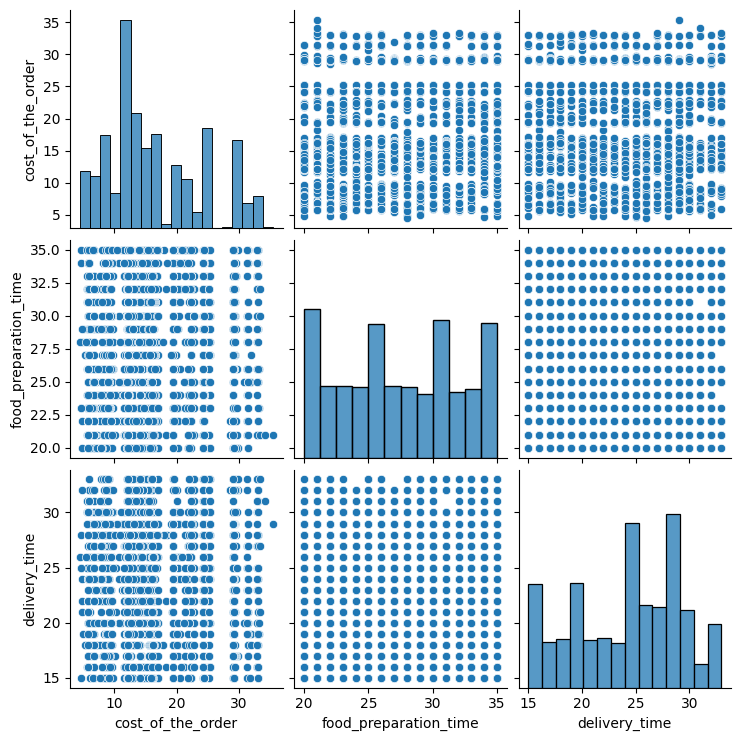

In [62]:
# Write the code here
sns.pairplot(data=data[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])

<Axes: >

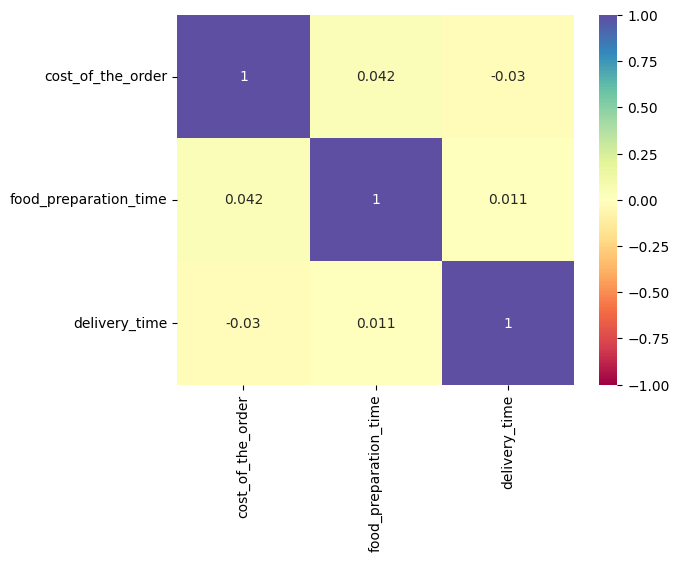

In [68]:
sns.heatmap(data=data[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True,cmap='Spectral',vmin=-1,vmax=1)

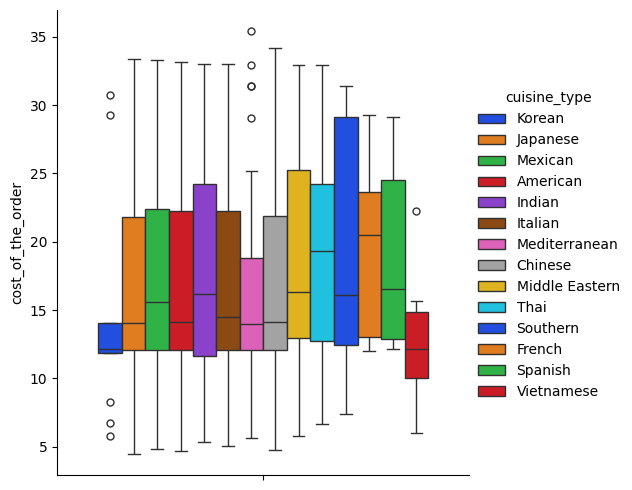

In [74]:
sns.catplot(data=data, y='cost_of_the_order', hue="cuisine_type", kind='box', palette='bright');
plt.xticks(rotation=90)
plt.show()

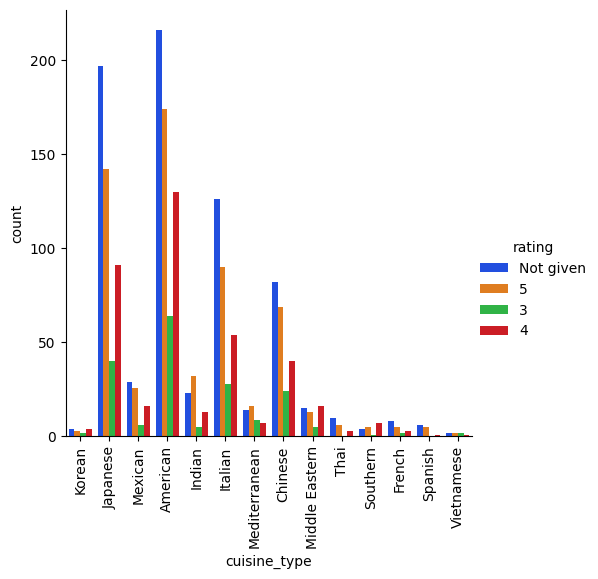

In [79]:
sns.catplot(data=data, x='cuisine_type', hue="rating", kind='count', palette='bright');
plt.xticks(rotation=90)
plt.show()

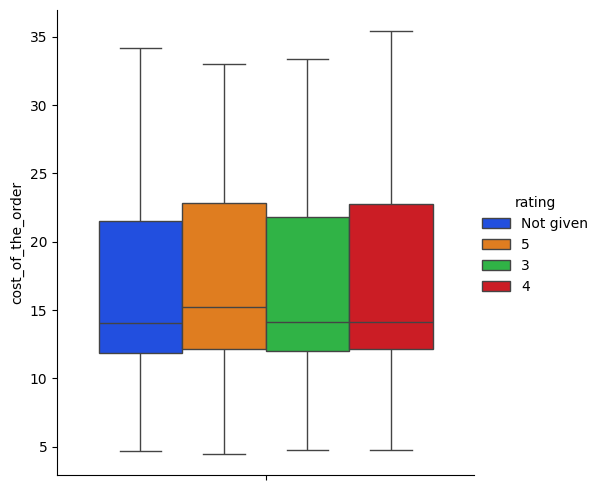

In [80]:
sns.catplot(data=data, y='cost_of_the_order', hue="rating", kind='box', palette='bright');
plt.xticks(rotation=90)
plt.show()

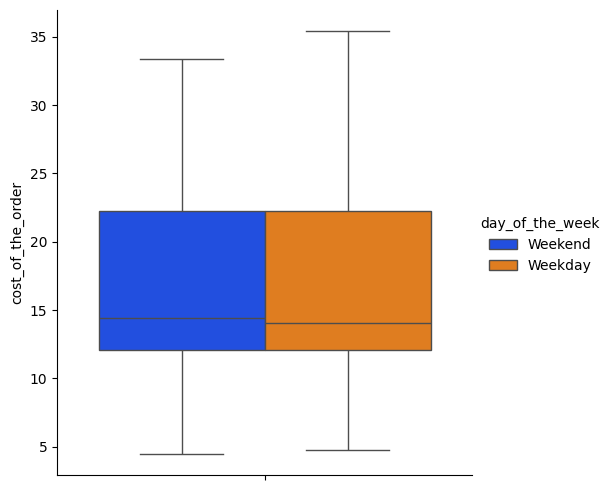

In [81]:
sns.catplot(data=data, y='cost_of_the_order', hue="day_of_the_week", kind='box', palette='bright');
plt.xticks(rotation=90)
plt.show()

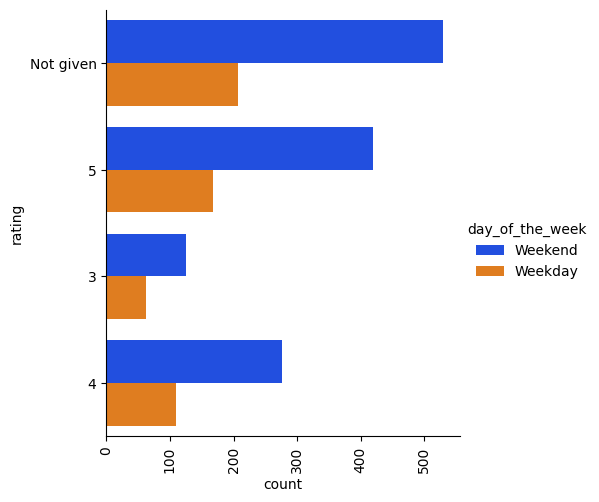

In [83]:
sns.catplot(data=data, y='rating', hue="day_of_the_week", kind='count', palette='bright');
plt.xticks(rotation=90)
plt.show()

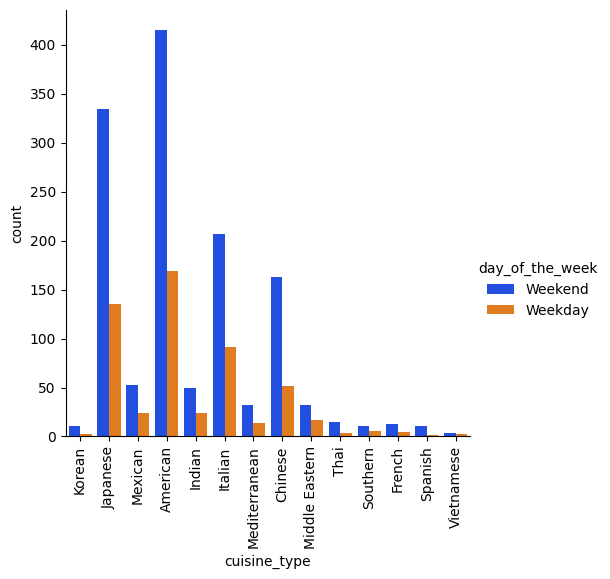

In [87]:
sns.catplot(data=data, x='cuisine_type', hue="day_of_the_week", kind='count', palette='bright');
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 140 (\x8c) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 142 (\x8e) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


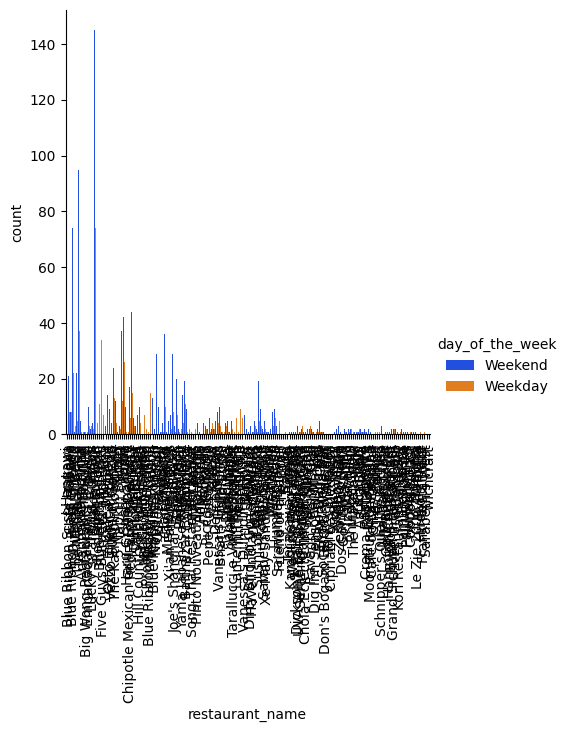

In [88]:
sns.catplot(data=data, x='restaurant_name', hue="day_of_the_week", kind='count', palette='bright');
plt.xticks(rotation=90)
plt.show()

In [89]:
data.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Klong,1
Kambi Ramen House,1
Il Bambino,1


In [95]:
data['restaurant_name'].nunique()

178

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [65]:
data['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [153]:
# Write the code here
#data.drop('int_rating', axis=1, inplace=True)
data_with_no_rating = data[data['rating'] != 'Not given'].copy()
#data['int_rating'] = data['rating'].replace(['Not given'], np.nan)
print(data_with_no_rating.shape)
data_with_no_rating['rating'] = data_with_no_rating['rating'].astype(int)
data_with_no_rating.info()
data_filtered = data_with_no_rating.groupby(['restaurant_name']).filter(lambda x: x['rating'].count() > 50)
print(data_filtered.shape)
data_filtered2 = data_filtered.groupby(['restaurant_name']).filter(lambda x: x['rating'].mean() > 4.0)
print(data_filtered2.shape)
data_filtered2.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False)

(1162, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB
(354, 9)
(354, 9)


,rating
restaurant_name,
The Meatball Shop,4.511905
Blue Ribbon Fried Chicken,4.328125
Shake Shack,4.278195
Blue Ribbon Sushi,4.219178


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [16]:
# Write the code here
rev_above_20 = data[data['cost_of_the_order'] > 20.00]['cost_of_the_order'].sum() * 0.25
rev_between_5_and_20 = data[(data['cost_of_the_order'] > 5.00) & (data['cost_of_the_order'] <= 20.00)]['cost_of_the_order'].sum() * 0.15

print('Total revenue=', (rev_above_20 + rev_between_5_and_20))


Total revenue= 6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [24]:
# Write the code here
data['total_time'] = data['food_preparation_time'] + data['delivery_time']
data.head()
((data[data['total_time'] > 60]['total_time'].count() / data['total_time'].count())  * 100).round(decimals=2)



10.54

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the

---

orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

['Weekend' 'Weekday']
Mean of delivery_time in Weekday's 28.34
Mean of delivery_time in Weekend's 22.47


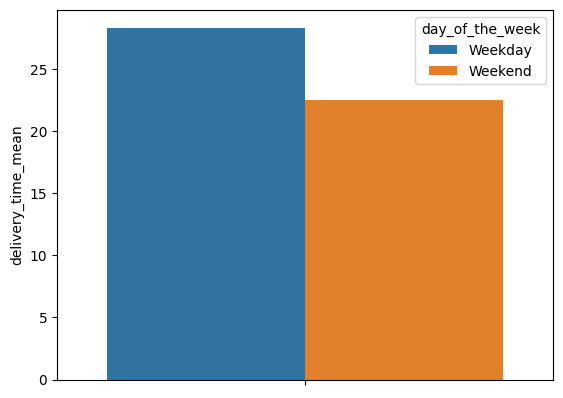

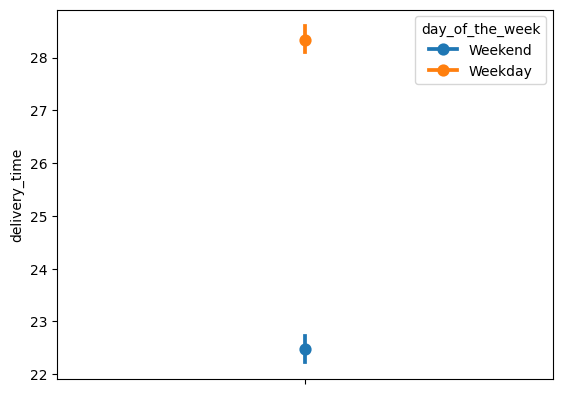

In [58]:
# Write the code here
print(data['day_of_the_week'].unique())
print('Mean of delivery_time in Weekday\'s',data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean().round(decimals=2))
print('Mean of delivery_time in Weekend\'s',data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean().round(decimals=2))

data_delivery_time_mean = data.groupby(['day_of_the_week'])['delivery_time'].mean(numeric_only=True).reset_index()
data_delivery_time_mean.rename(columns={'delivery_time': 'delivery_time_mean'}, inplace=True)

#[['day_of_the_week', 'delivery_time_mean']] = df_mean[['day_of_the_week', 'delivery_time']]

# Create barplot
sns.barplot(data=data_delivery_time_mean, y='delivery_time_mean', hue='day_of_the_week')
plt.show()

sns.pointplot(data=data, y='delivery_time', hue='day_of_the_week', estimator="mean")
plt.show()


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---

In [59]:
!pip install nbconvert

In [60]:
!jupyter nbconvert --to html /content/drive/MyDrive/PGPAIML/Project-1/Learner_Notebook_Full_Code.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/PGPAIML/Project-1/Learner_Notebook_Full_Code.ipynb to html
[NbConvertApp] Writing 1643476 bytes to /content/drive/MyDrive/PGPAIML/Project-1/Learner_Notebook_Full_Code.html
